In [1]:
import networkx as nx
import Complexity as cx
import matplotlib.pyplot as plt
import utilities as ut
import numpy as np

In [2]:
methods = ["C1est","C1espec","C2espec","OdC","MAg","Cr","Ce","MAri"]

In [3]:
#Generates random graphs and data
n=7
graphs,df = ut.random_networks(n=n,use_all_m = True,sample_number = 50)

In [4]:
#Find the complexities of the graphs
results = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in graphs]
    results.append(temp_result)

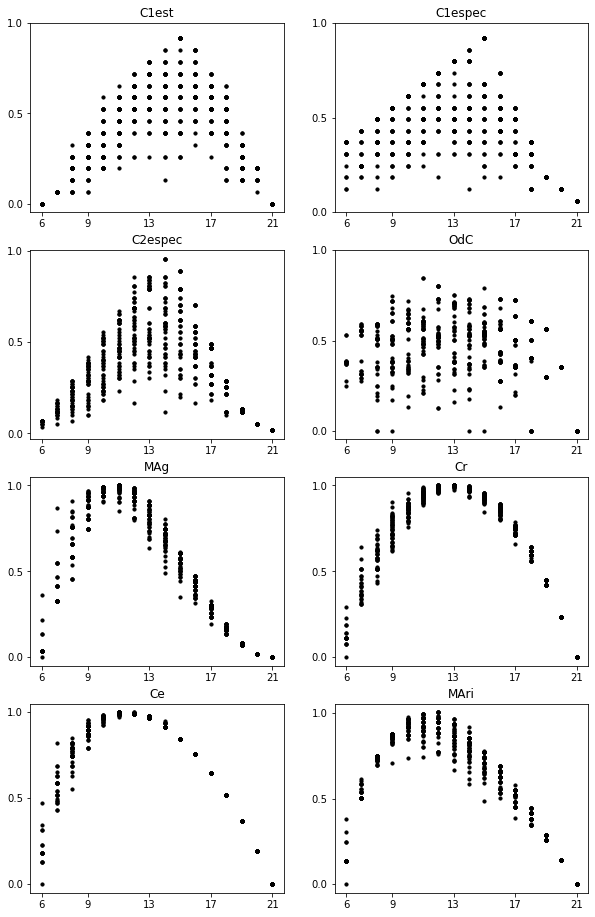

In [37]:
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter(df["Number_of_edges"],results[c],s=10,color = "black")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_title(methods[c])
        axes[i][j].set_xticks(xticks)
        c+=1
plt.show()

In [107]:
#Generates special random graphs
n = 20
BA_graphs = ut.BA_random_graphs(n=n,sample_number = 500)
WS_graphs = ut.WS_random_graphs(n=n,sample_number = 500)
NW_graphs = ut.NW_random_graphs(n=n,sample_number = 500)

In [ ]:
#Calculates the complexity of special random graphs
BA_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in BA_graphs]
    BA_result.append(temp_result)

WS_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in WS_graphs]
    WS_result.append(temp_result)

NW_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in NW_graphs]
    NW_result.append(temp_result)

In [ ]:
# Calculates the complexities of special graphs
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter([len(g.edges) for g in BA_graphs],BA_result[c],s=10,color = "black",label = "BA")
        axes[i][j].scatter([len(g.edges) for g in WS_graphs],WS_result[c],marker = "x",s=10,color = "black",label = "WS")
        axes[i][j].scatter([len(g.edges) for g in NW_graphs],NW_result[c],marker = "s",s=10,color = "black",label = "NW")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_title(methods[c])
        axes[i][j].set_xticks(xticks)
        c+=1
plt.legend()
plt.show()

In [ ]:
#Calculates the average complexities
m = np.linspace(n-1,n*(n-1)/2,int(n*(n-1)/2-n+1+1))
m = [int(item) for item in m]

In [ ]:
BA_avg = [0]*len(m)
WS_avg = [0]*len(m)
NW_avg = [0]*len(m)
c = [0]*len(m)
for g in WS_graphs:
    i = len(g.edges)
    WS_avg[i-n+1] = WS_avg[i-n+1] + cx.MAri(g)
    c[i-n+1] += 1
for i in range(len(c)):
    if c[i] != 0:
        WS_avg[i] = WS_avg[i]/c[i]

c = [0]*len(m)
for g in NW_graphs:
    i = len(g.edges)
    NW_avg[i-n+1] = NW_avg[i-n+1] + cx.MAri(g)
    c[i-n+1] += 1
for i in range(len(c)):
    if c[i] != 0:
        NW_avg[i] = NW_avg[i]/c[i]

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(m,NW_avg,label = "Newman-Watts")
plt.bar(m,WS_avg,color = "red", label = "Watts-Strogatz")
plt.legend()
plt.xlabel("m")
plt.ylabel("Average MAri")